# <center> Predicting COVID-19 Hospitalizations

In this case study, we are going to see an example of data analytics that can be of meaningful value to
a local government department. We are going to focus on the government of Los Angeles County
(LA), California. This county is the most populated in the US, with approximately 10 million
residents. We are going to use historical data to predict the number of patients that will need
hospitalization in the near future; specifically, we will create a model that can predict the number of
hospitalizations in LA County two weeks from the present moment.


## Introducing the source of the data

The following list shows four sources of data that can be useful for predicting hospitalizations:
* Historical data of LA County COVID-19 hospitalizations (https://data.chhs.ca.gov/dataset/covid-19-hospital-data)
* Historical data of COVID-19 Cases and Deaths in LA County (https://data.chhs.ca.gov/dataset/covid-19-time-series-metrics-bycounty-and-state)
* Historical data of COVID-19 Vaccinations in LA County (https://data.chhs.ca.gov/dataset/covid-19-vaccine-progress-dashboarddata-by-zip-code)

The dates of US public holidays (these can be accessed via Google)
You can download the latest versions of these datasets from the provided links. The three datasets
that we use in this chapter, covid19hospitalbycounty.csv, covid19cases_test.csv, and
covid19vaccinesbyzipcode_test.csv, were collected on October 3, 2021. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.linear_model import LinearRegression
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
import graphviz
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor


## Preprocessing the data

Our goal in this case study is to make a prediction for two full weeks (that is, 14 days) in the future. 

### First Data
https://data.chhs.ca.gov/dataset/covid-19-hospital-data 

covid19hospitalbycounty.csv

In [2]:
day_hosp_df = pd.read_csv('../datasets/covid19hospitalbycounty.csv')
day_hosp_df

,county,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
0,Del Norte,2020-03-29,1.0,2.0,NaN,NaN,0.0,0.0,3.0
1,Lassen,2020-03-29,0.0,2.0,NaN,NaN,0.0,0.0,NaN
2,Riverside,2020-03-29,44.0,78.0,NaN,NaN,13.0,20.0,46.0
3,Tehama,2020-03-29,0.0,0.0,NaN,NaN,0.0,0.0,2.0
4,Sutter,2020-03-29,0.0,0.0,NaN,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
31016,Mendocino,2021-10-03,10.0,1.0,11.0,92.0,3.0,0.0,3.0
31017,San Diego,2021-10-03,329.0,15.0,344.0,6477.0,90.0,0.0,220.0
31018,Marin,2021-10-03,14.0,2.0,16.0,330.0,4.0,0.0,9.0
31019,Napa,2021-10-03,12.0,0.0,12.0,212.0,6.0,0.0,5.0


### Second Data
https://data.chhs.ca.gov/dataset/covid-19-time-series-metrics-by-county-and-state

covid19cases_test.csv

In [3]:
day_case_df = pd.read_csv('../datasets/covid19cases_test.csv')
day_case_df

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
0,2020-02-01,Alameda,County,1685886.0,3.0,3.0,0.0,0.0,4.0,4,0.0,0,0.0,0.0,0.0,0.0,NaN
1,2020-02-02,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
2,2020-02-03,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
3,2020-02-04,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
4,2020-02-05,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,6,0.0,0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37327,2021-09-30,Yuba,County,79290.0,29.0,9445.0,0.0,49.0,316.0,106071,33.0,10885,19.0,9370.0,0.0,66.0,381.0
37328,2021-10-01,Yuba,County,79290.0,11.0,9456.0,0.0,49.0,138.0,106209,11.0,10896,0.0,9370.0,0.0,66.0,NaN
37329,2021-10-02,Yuba,County,79290.0,4.0,9460.0,0.0,49.0,48.0,106257,8.0,10904,0.0,9370.0,0.0,66.0,NaN
37330,2021-10-03,Yuba,County,79290.0,0.0,9460.0,0.0,49.0,NaN,106257,NaN,10904,92.0,9462.0,2.0,68.0,1320.0


### Third Data

https://data.chhs.ca.gov/dataset/covid-19-vaccine-progress-dashboard-data-by-zip-code

covid19vaccinesbyzipcode_test.csv

In [4]:
day_vax_df = pd.read_csv('../datasets/covid19vaccinesbyzipcode_test.csv')
day_vax_df

,as_of_date,zip_code_tabulation_area,local_health_jurisdiction,county,vaccine_equity_metric_quartile,vem_source,age12_plus_population,persons_fully_vaccinated,persons_partially_vaccinated,percent_of_population_fully_vaccinated,percent_of_population_partially_vaccinated,percent_of_population_with_1_plus_dose,redacted
0,2021-01-05,92284,San Bernardino,San Bernardino,1.0,Healthy Places Index Score,22254.9,NaN,NaN,NaN,NaN,NaN,Information redacted in accordance with CA sta...
1,2021-01-05,92841,Orange,Orange,2.0,Healthy Places Index Score,29342.3,NaN,NaN,NaN,NaN,NaN,Information redacted in accordance with CA sta...
2,2021-01-05,92614,Orange,Orange,4.0,Healthy Places Index Score,23212.5,NaN,NaN,NaN,NaN,NaN,Information redacted in accordance with CA sta...
3,2021-01-05,92346,San Bernardino,San Bernardino,2.0,Healthy Places Index Score,52408.8,NaN,NaN,NaN,NaN,NaN,Information redacted in accordance with CA sta...
4,2021-01-05,92354,San Bernardino,San Bernardino,2.0,Healthy Places Index Score,19546.6,48.0,2060.0,0.002456,0.105389,0.107845,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68791,2021-09-28,94965,Marin,Marin,4.0,Healthy Places Index Score,10121.5,8451.0,625.0,0.834955,0.061750,0.896705,No
68792,2021-09-28,95335,Tuolumne,Tuolumne,2.0,CDPH-Derived ZCTA Score,153.0,181.0,22.0,1.000000,0.143791,1.000000,No
68793,2021-09-28,92592,Riverside,Riverside,3.0,Healthy Places Index Score,69581.7,38493.0,4820.0,0.553206,0.069271,0.622477,No
68794,2021-09-28,95501,Humboldt,Humboldt,2.0,Healthy Places Index Score,20566.6,13435.0,1570.0,0.653244,0.076337,0.729581,No


### Designing the Dataset that supports the prediction

The following list shows the independent attributes that we may
come up with for this prediction task.


In [5]:
column_dic = {'n_Hosp_t0': 'The number of hospitalizations at t=0',
               's_Hosp_tn7_0': 'The slope of the curve of hospitalizations for the period t=-7 to t=0',
               'Bn_days_MajHol': 'The number of days from the previous major holiday',
               'av7_Case_tn6_0': 'The seven-day average of the number of cases for the period t=-6 to t=0',
               's_Case_tn14_0': 'The slope of the curve of cases for the period t=-14 to t=0',
               'av7_Death_tn6_0': 'The seven-day average of the number of deaths for the period t=-6 to t=0',
               's_Death_tn14_0': 'The slope of the curve of deaths for the period t=-14 to t=0',
               'p_FullVax_t0': 'The percentage of fully vaccinated people at t=0',
               's_FullVax_tn14_0': 'The slope of the curve of the percentage of fully vaccinated people for the period t=-14 to t=0'}

col_dic_df = pd.DataFrame.from_dict(column_dic, orient='index', columns=['Description'])
col_dic_df

,Description
n_Hosp_t0,The number of hospitalizations at t=0
s_Hosp_tn7_0,The slope of the curve of hospitalizations for...
Bn_days_MajHol,The number of days from the previous major hol...
av7_Case_tn6_0,The seven-day average of the number of cases f...
s_Case_tn14_0,The slope of the curve of cases for the period...
av7_Death_tn6_0,The seven-day average of the number of deaths ...
s_Death_tn14_0,The slope of the curve of deaths for the perio...
p_FullVax_t0,The percentage of fully vaccinated people at t=0
s_FullVax_tn14_0,The slope of the curve of the percentage of fu...


In [6]:
column_dic

{'n_Hosp_t0': 'The number of hospitalizations at t=0',
 's_Hosp_tn7_0': 'The slope of the curve of hospitalizations for the period t=-7 to t=0',
 'Bn_days_MajHol': 'The number of days from the previous major holiday',
 'av7_Case_tn6_0': 'The seven-day average of the number of cases for the period t=-6 to t=0',
 's_Case_tn14_0': 'The slope of the curve of cases for the period t=-14 to t=0',
 'av7_Death_tn6_0': 'The seven-day average of the number of deaths for the period t=-6 to t=0',
 's_Death_tn14_0': 'The slope of the curve of deaths for the period t=-14 to t=0',
 'p_FullVax_t0': 'The percentage of fully vaccinated people at t=0',
 's_FullVax_tn14_0': 'The slope of the curve of the percentage of fully vaccinated people for the period t=-14 to t=0'}

In [7]:
day_df = pd.DataFrame(index=range(len(day_hosp_df.todays_date.unique())), 
                      columns=['t0','n_Hosp_t0','s_Hosp_tn7_0',
                              'n_days_MajHol',
                               'av7_Case_tn6_0','s_Case_tn14_0',
                               'av7_Death_tn6_0','s_Death_tn14_0',
                               'p_FullVax_t0','s_FullVax_tn14_0',
                               'n_Hosp_t14'] )
day_df

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
day_df.t0 = pd.to_datetime(day_hosp_df.todays_date.unique(), format='%Y-%m-%d')
day_df

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
0,2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
549,2021-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
551,2021-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
552,2021-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Filling up the placeholder

In [9]:
day_hosp_df.todays_date = pd.to_datetime(day_hosp_df.todays_date, format='%Y-%m-%d')
day_hosp_df.set_index('todays_date', drop=False, inplace=True)

In [10]:
day_case_df.date = pd.to_datetime(day_case_df.date, format='%Y-%m-%d')
day_case_df.set_index('date', drop=False, inplace=True)

In [11]:
BM = day_case_df.area == 'Los Angeles'
day_case_df = pd.DataFrame(day_case_df[BM])
day_case_df

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
date,,,,,,,,,,,,,,,,,
2020-02-01,2020-02-01,Los Angeles,County,10257557.0,14.0,14.0,0.0,0.0,283.0,283,9.0,9,1.0,1.0,0.0,0.0,NaN
2020-02-02,2020-02-02,Los Angeles,County,10257557.0,1.0,15.0,0.0,0.0,23.0,306,1.0,10,0.0,1.0,0.0,0.0,NaN
2020-02-03,2020-02-03,Los Angeles,County,10257557.0,2.0,17.0,0.0,0.0,14.0,320,1.0,11,0.0,1.0,0.0,0.0,NaN
2020-02-04,2020-02-04,Los Angeles,County,10257557.0,0.0,17.0,0.0,0.0,3.0,323,0.0,11,0.0,1.0,0.0,0.0,NaN
2020-02-05,2020-02-05,Los Angeles,County,10257557.0,1.0,18.0,0.0,0.0,2.0,325,0.0,11,0.0,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,2021-09-30,Los Angeles,County,10257557.0,987.0,1397957.0,5.0,26171.0,85487.0,32488086,879.0,1793703,1453.0,1395070.0,28.0,26126.0,126665.0
2021-10-01,2021-10-01,Los Angeles,County,10257557.0,589.0,1398546.0,1.0,26172.0,4274.0,32492360,99.0,1793802,0.0,1395070.0,0.0,26126.0,NaN
2021-10-02,2021-10-02,Los Angeles,County,10257557.0,15.0,1398561.0,2.0,26174.0,126.0,32492486,6.0,1793808,0.0,1395070.0,0.0,26126.0,NaN


In [12]:
day_vax_df = pd.DataFrame(day_vax_df.groupby(['as_of_date', 'county']).percent_of_population_fully_vaccinated.mean().reset_index())
BM = day_vax_df.county == 'Los Angeles'
day_vax_df = pd.DataFrame(day_vax_df[BM]).reset_index(drop=True)
day_vax_df.head()

,as_of_date,county,percent_of_population_fully_vaccinated
0,2021-01-05,Los Angeles,0.000651
1,2021-01-12,Los Angeles,0.011924
2,2021-01-19,Los Angeles,0.016121
3,2021-01-26,Los Angeles,0.020387
4,2021-02-02,Los Angeles,0.027631


In [13]:
day_vax_df.as_of_date = pd.to_datetime(day_vax_df.as_of_date, format='%Y-%m-%d')
day_vax_df.drop(columns=['county'], inplace=True)
day_vax_df.columns = ['Date', 'percent_of_population_fully_vaccinated']
day_vax_df.head()

,Date,percent_of_population_fully_vaccinated
0,2021-01-05,0.000651
1,2021-01-12,0.011924
2,2021-01-19,0.016121
3,2021-01-26,0.020387
4,2021-02-02,0.027631


In [14]:
dates_toadd = list(set(day_hosp_df.todays_date)^set(day_vax_df.Date))
df_toadd = pd.DataFrame(pd.Series({i:np.nan for i in dates_toadd})).reset_index()
df_toadd.columns = ['Date', 'percent_of_population_fully_vaccinated']
df_toadd.head()

,Date,percent_of_population_fully_vaccinated
0,2020-11-13,NaN
1,2021-06-02,NaN
2,2021-05-09,NaN
3,2021-01-10,NaN
4,2021-05-01,NaN


In [15]:
day_vax_df =  pd.concat([day_vax_df, df_toadd]).sort_values('Date').reset_index(drop=True)
day_vax_df.set_index('Date', drop=False, inplace=True)
day_vax_df.loc[day_vax_df[:'2021-01-04'].index, 'percent_of_population_fully_vaccinated']=0
day_vax_df.interpolate(method='ffill', inplace=True)
day_vax_df

,Date,percent_of_population_fully_vaccinated
Date,,
2020-03-29,2020-03-29,0.000000
2020-03-30,2020-03-30,0.000000
2020-03-31,2020-03-31,0.000000
2020-04-01,2020-04-01,0.000000
2020-04-02,2020-04-02,0.000000
...,...,...
2021-09-29,2021-09-29,0.712213
2021-09-30,2021-09-30,0.712213
2021-10-01,2021-10-01,0.712213


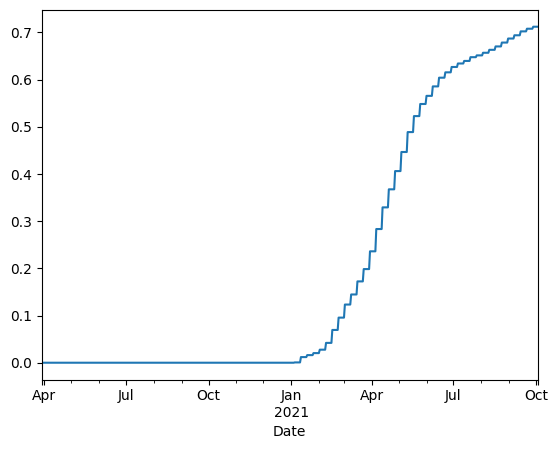

In [16]:
day_vax_df.percent_of_population_fully_vaccinated.plot()
plt.show()

### Fill n_Hosp_t0

In [17]:
BM = day_hosp_df.county == 'Los Angeles'
wdf = pd.DataFrame(day_hosp_df[BM]).set_index('todays_date')
wdf

,county,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
todays_date,,,,,,,,
2020-03-29,Los Angeles,489.0,1132.0,NaN,NaN,191.0,182.0,345.0
2020-03-30,Los Angeles,601.0,1277.0,NaN,NaN,245.0,244.0,456.0
2020-03-31,Los Angeles,713.0,1239.0,NaN,NaN,315.0,239.0,445.0
2020-04-01,Los Angeles,739.0,1332.0,NaN,NaN,335.0,220.0,492.0
2020-04-02,Los Angeles,818.0,1270.0,NaN,NaN,346.0,193.0,488.0
...,...,...,...,...,...,...,...,...
2021-09-29,Los Angeles,872.0,98.0,970.0,19337.0,246.0,7.0,547.0
2021-09-30,Los Angeles,862.0,99.0,961.0,19334.0,234.0,5.0,551.0
2021-10-01,Los Angeles,825.0,73.0,898.0,19304.0,231.0,7.0,545.0


In [18]:
day_df.n_Hosp_t0 = wdf.reset_index().hospitalized_covid_confirmed_patients
day_df

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
0,2020-03-29,489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-30,601.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-31,713.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-04-01,739.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-04-02,818.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
549,2021-09-29,872.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550,2021-09-30,862.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
551,2021-10-01,825.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
552,2021-10-02,790.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


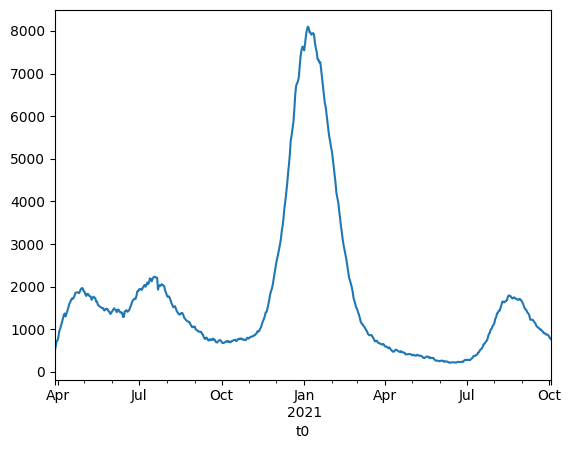

In [19]:
day_df.set_index('t0', drop=False, inplace=True)
day_df.n_Hosp_t0.plot()
plt.show()

### Fill n_Hosp_t14

In [20]:
def Retrieven_Hosp_t14(row):
    date_t0 = row.t0
    date_t14 = date_t0 + datetime.timedelta(days=14)
    #print(date_t14)
    if(date_t14 < day_df.iloc[-1].t0):
        return day_df.loc[date_t14].n_Hosp_t0

In [21]:
day_df.n_Hosp_t14 = day_df.apply(Retrieven_Hosp_t14, axis=1)
day_df

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
t0,,,,,,,,,,,
2020-03-29,2020-03-29,489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1433.0
2020-03-30,2020-03-30,601.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1501.0
2020-03-31,2020-03-31,713.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1587.0
2020-04-01,2020-04-01,739.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1624.0
2020-04-02,2020-04-02,818.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1679.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-29,2021-09-29,872.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-30,2021-09-30,862.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-01,2021-10-01,825.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Fill s_Hosp_tn7_0

In [22]:
def linearFunction(t,a,b):
    y = a+ b*t
    return y

In [23]:
import datetime
from scipy.optimize import curve_fit
def Retrieve_s_Hosp_tn7_0(row):
    date_t0 = row.t0
    date_t_n7 = date_t0 - datetime.timedelta(days=7)
    if(date_t_n7 >= day_df.iloc[0].t0):
        x_data = range(8)
        y_data = day_df.loc[date_t_n7:date_t0].n_Hosp_t0
        p,c= curve_fit(linearFunction, x_data, y_data)
        ## Uncomment and run if you want to see the curve fitting, Caveat: it will increase runtime
        #fit_y = linearFunction(x_data,p[0],p[1])
        #plt.plot(x_data,y_data,label='data' )
        #plt.plot(x_data, fit_y, '--', label='fit')
        #plt.xticks(x_data,y_data.index)
        #plt.legend()
        #plt.show()
        return p[1]

In [24]:
day_df.s_Hosp_tn7_0 = day_df.apply(Retrieve_s_Hosp_tn7_0,axis=1)
day_df

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
t0,,,,,,,,,,,
2020-03-29,2020-03-29,489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1433.0
2020-03-30,2020-03-30,601.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1501.0
2020-03-31,2020-03-31,713.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1587.0
2020-04-01,2020-04-01,739.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1624.0
2020-04-02,2020-04-02,818.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1679.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-29,2021-09-29,872.0,-16.928571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-30,2021-09-30,862.0,-13.773810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-01,2021-10-01,825.0,-14.380952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


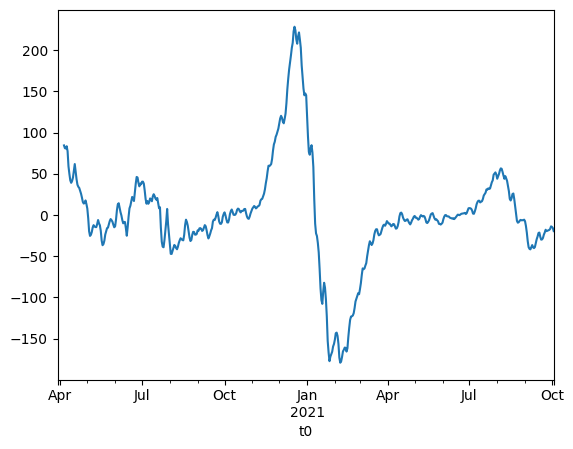

In [25]:
day_df.s_Hosp_tn7_0.plot()
plt.show()

### Fill n_days_MajHol

In [26]:
dic_holidays={'Martin Luther King Jr. Day':'01/20/2020','Martin Luther King Jr. Day2':'01/21/2020',
             'Martin Luther King Jr. Day3':'01/22/2020',
             'Memorial day1': '05/23/2020','Memorial day2': '05/24/2020','Memorial day3': '05/25/2020',
             'Independence day1': '07/03/2020','Independence day2': '07/04/2020','Independence day3': '07/03/2020',
             'Labor day1': '09/05/2020','Labor day2': '09/06/2020','Labor day3': '09/07/2020',
             'Thanksgiving1': '11/26/2020', 'Thanksgiving2': '11/27/2020','Thanksgiving3': '11/28/2020',
             'Thanksgiving4': '11/29/2020', 'Christmas1': '12/25/2020', 'Christmas2': '12/26/2020',
             'Christmas3': '12/27/2020', 'Christmas4': '12/28/2020','Christmas5': '12/29/2020',
             'Christmas6': '12/30/2020', 'New Year Day': '01/01/2021','New Year Day2': '01/02/2021',
             'New Year Day3': '01/03/2021',
             'Martin Luther King Jr. Day_2021':'01/18/2021','Martin Luther King Jr. Day2_2021':'01/19/2021',
             'Martin Luther King Jr. Day3_2021':'01/20/2021',
             'Memorial day1_2021': '05/31/2021','Memorial day2_2021': '06/01/2021','Memorial day3_2021': '06/02/2021',
             'Independence day1_2021': '07/05/2021','Independence day2_2021': '07/06/2021',
             'Independence day3_2021': '07/07/2021',
             'Labor day1_2021': '09/06/2021','Labor day2_2021': '09/07/2021','Labor day3_2021': '09/08/2021'}

In [27]:
holiday_sr = pd.Series(dic_holidays, name='Date')
holiday_sr = pd.to_datetime(holiday_sr, format='%m/%d/%Y')
holiday_sr.sort_values()

Martin Luther King Jr. Day         2020-01-20
Martin Luther King Jr. Day2        2020-01-21
Martin Luther King Jr. Day3        2020-01-22
Memorial day1                      2020-05-23
Memorial day2                      2020-05-24
Memorial day3                      2020-05-25
Independence day3                  2020-07-03
Independence day1                  2020-07-03
Independence day2                  2020-07-04
Labor day1                         2020-09-05
Labor day2                         2020-09-06
Labor day3                         2020-09-07
Thanksgiving1                      2020-11-26
Thanksgiving2                      2020-11-27
Thanksgiving3                      2020-11-28
Thanksgiving4                      2020-11-29
Christmas1                         2020-12-25
Christmas2                         2020-12-26
Christmas3                         2020-12-27
Christmas4                         2020-12-28
Christmas5                         2020-12-29
Christmas6                        

In [28]:
t0 = day_df.iloc[0].t0

wsr = pd.concat([holiday_sr,pd.Series({'This one':t0})]).sort_values()
wdf = pd.DataFrame(wsr).reset_index(drop=False)
wdf.columns=['name','Date']
wdf

,name,Date
0,Martin Luther King Jr. Day,2020-01-20
1,Martin Luther King Jr. Day2,2020-01-21
2,Martin Luther King Jr. Day3,2020-01-22
3,This one,2020-03-29
4,Memorial day1,2020-05-23
5,Memorial day2,2020-05-24
6,Memorial day3,2020-05-25
7,Independence day1,2020-07-03
8,Independence day3,2020-07-03
9,Independence day2,2020-07-04


In [29]:
def Retrieve_n_days_MajHol(row):
    wsr = pd.concat([holiday_sr,
                     pd.Series({'This one':row.t0})]).sort_values()
    wdf = pd.DataFrame(wsr).reset_index(drop=False)
    wdf.columns=['name','Date']
    BM = wdf.name == 'This one'
    t_holiday = wdf.iloc[wdf[BM].index-1].Date.iloc[0]
    return((row.t0-t_holiday).days)

In [30]:
day_df.n_days_MajHol = day_df.apply(Retrieve_n_days_MajHol,axis=1)
day_df

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
t0,,,,,,,,,,,
2020-03-29,2020-03-29,489.0,NaN,67,NaN,NaN,NaN,NaN,NaN,NaN,1433.0
2020-03-30,2020-03-30,601.0,NaN,68,NaN,NaN,NaN,NaN,NaN,NaN,1501.0
2020-03-31,2020-03-31,713.0,NaN,69,NaN,NaN,NaN,NaN,NaN,NaN,1587.0
2020-04-01,2020-04-01,739.0,NaN,70,NaN,NaN,NaN,NaN,NaN,NaN,1624.0
2020-04-02,2020-04-02,818.0,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,1679.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-29,2021-09-29,872.0,-16.928571,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-30,2021-09-30,862.0,-13.773810,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-01,2021-10-01,825.0,-14.380952,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Fill av7_Case_tn6_0

In [31]:
def Retrieve_av7_Case_tn6_0(row):
    date_t0 = row.t0
    date_t_n6 = date_t0 - datetime.timedelta(days=6)
    if(date_t_n6 >= day_df.iloc[0].t0):
        return(day_case_df.loc[date_t_n6:date_t0].cases.mean())

<Axes: xlabel='t0'>

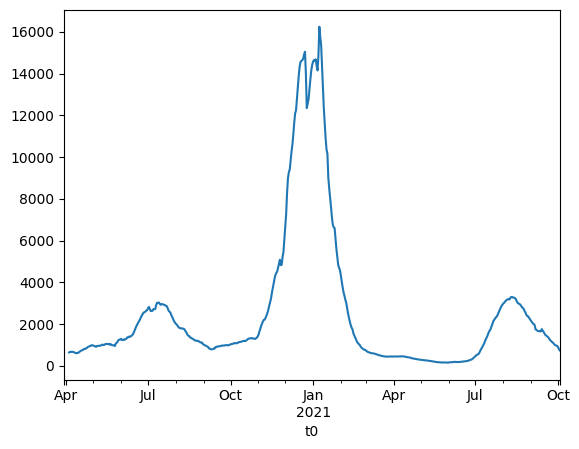

In [32]:
day_df.av7_Case_tn6_0 = day_df.apply(Retrieve_av7_Case_tn6_0,axis=1)
day_df.av7_Case_tn6_0.plot()

### Fill s_Case_tn14_0

In [33]:
def Retrieve_s_Case_tn14_0(row):
    date_t0 = row.t0
    date_t_n14 = date_t0 - datetime.timedelta(days=14)
    if(date_t_n14 >= day_df.iloc[0].t0):
        x_data = range(15)
        y_data = day_case_df.loc[date_t_n14:date_t0].cases
        p,c= curve_fit(linearFunction, x_data, y_data)
        ## Uncomment and run if you want to see the curve fitting, Caveat: it will increase runtime
        #fit_y = linearFunction(x_data,p[0],p[1])
        #plt.plot(x_data,y_data,label='data' )
        #plt.plot(x_data, fit_y, '--', label='fit')
        #plt.xticks(x_data,y_data.index)
        #plt.legend()
        #plt.show()
        return p[1]

<Axes: xlabel='t0'>

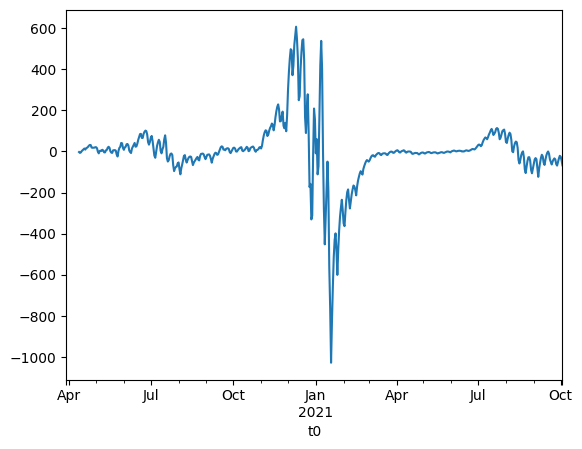

In [34]:
day_df.s_Case_tn14_0 = day_df.apply(Retrieve_s_Case_tn14_0,axis=1)
day_df.s_Case_tn14_0.plot()

### Fill av7_Death_tn6_0

In [35]:
def Retrieve_av7_Death_tn6_0(row):
    date_t0 = row.t0
    date_t_n6 = date_t0 - datetime.timedelta(days=6)
    if(date_t_n6 >= day_df.iloc[0].t0):
        return(day_case_df.loc[date_t_n6:date_t0].deaths.mean())

<Axes: xlabel='t0'>

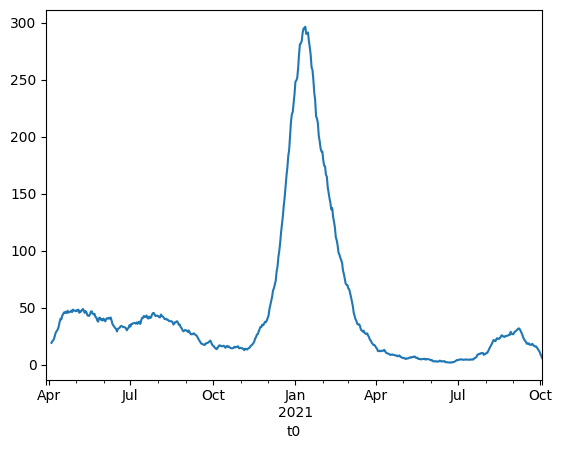

In [36]:
day_df.av7_Death_tn6_0 = day_df.apply(Retrieve_av7_Death_tn6_0,axis=1)
day_df.av7_Death_tn6_0.plot()

### Fill s_Death_tn14_0

In [37]:
def Retrieve_s_Deat_tn14_0(row):
    date_t0 = row.t0
    date_t_n14 = date_t0 - datetime.timedelta(days=14)
    if(date_t_n14 >= day_df.iloc[0].t0):
        x_data = range(15)
        y_data = day_case_df.loc[date_t_n14:date_t0].deaths
        p,c= curve_fit(linearFunction, x_data, y_data)
        ## Uncomment and run if you want to see the curve fitting, Caveat: it will increase runtime
        #fit_y = linearFunction(x_data,p[0],p[1])
        #plt.plot(x_data,y_data,label='data' )
        #plt.plot(x_data, fit_y, '--', label='fit')
        #plt.xticks(x_data,y_data.index)
        #plt.legend()
        #plt.show()
        return p[1]

<Axes: xlabel='t0'>

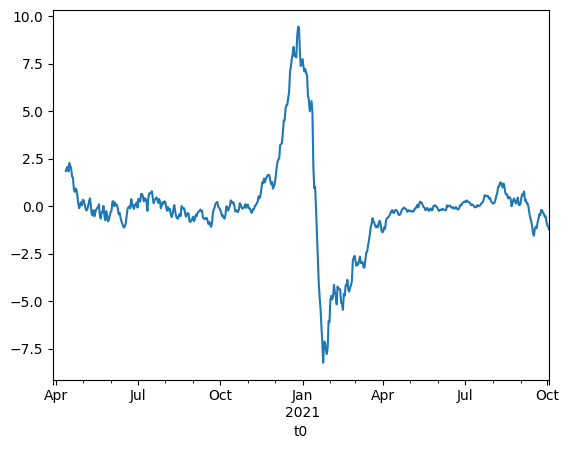

In [38]:
day_df.s_Death_tn14_0 = day_df.apply(Retrieve_s_Deat_tn14_0,axis=1)
day_df.s_Death_tn14_0.plot()

### Fill p_FullVax_t0

In [39]:
def Retrieve_p_FullVax_t0(row):
    date_t0 = row.t0
    return(day_vax_df.loc[date_t0].percent_of_population_fully_vaccinated)

<Axes: xlabel='t0'>

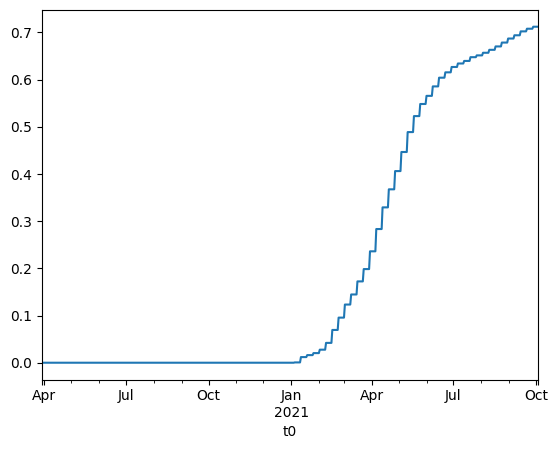

In [40]:
day_df.p_FullVax_t0 = day_df.apply(Retrieve_p_FullVax_t0,axis=1)
day_df.p_FullVax_t0.plot()

### Fill s_FullVax_tn14_0

In [41]:
def Retrieve_s_FullVax_tn14_0(row):
    date_t0 = row.t0
    date_t_n14 = date_t0 - datetime.timedelta(days=14)
    if(date_t_n14 >= day_df.iloc[0].t0):
        x_data = range(15)
        y_data = day_vax_df.loc[date_t_n14:date_t0].percent_of_population_fully_vaccinated
        p,c= curve_fit(linearFunction, x_data, y_data)
        ## Uncomment and run if you want to see the curve fitting, Caveat: it will increase runtime
        #if(p[1]>0):
        #    fit_y = linearFunction(x_data,p[0],p[1])
        #    plt.plot(x_data,y_data,label='data' )
        #    plt.plot(x_data, fit_y, '--', label='fit')
        #    plt.xticks(x_data,y_data.index)
        #    plt.legend()
        #    plt.show()
        return p[1]

<Axes: xlabel='t0'>

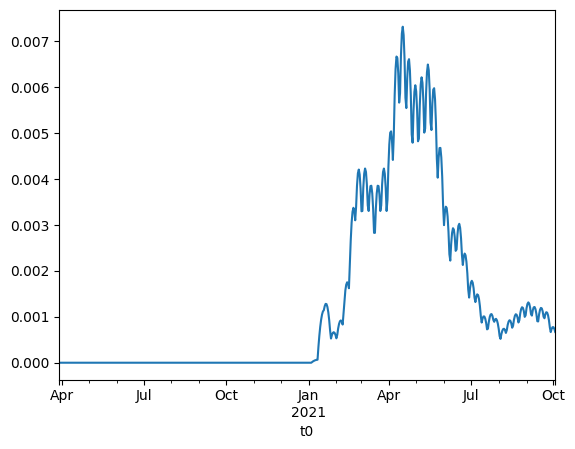

In [42]:
day_df.s_FullVax_tn14_0 = day_df.apply(Retrieve_s_FullVax_tn14_0,axis=1)
day_df.s_FullVax_tn14_0.fillna(0,inplace=True)
day_df.s_FullVax_tn14_0.plot()

In [43]:
day_case_df

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
date,,,,,,,,,,,,,,,,,
2020-02-01,2020-02-01,Los Angeles,County,10257557.0,14.0,14.0,0.0,0.0,283.0,283,9.0,9,1.0,1.0,0.0,0.0,NaN
2020-02-02,2020-02-02,Los Angeles,County,10257557.0,1.0,15.0,0.0,0.0,23.0,306,1.0,10,0.0,1.0,0.0,0.0,NaN
2020-02-03,2020-02-03,Los Angeles,County,10257557.0,2.0,17.0,0.0,0.0,14.0,320,1.0,11,0.0,1.0,0.0,0.0,NaN
2020-02-04,2020-02-04,Los Angeles,County,10257557.0,0.0,17.0,0.0,0.0,3.0,323,0.0,11,0.0,1.0,0.0,0.0,NaN
2020-02-05,2020-02-05,Los Angeles,County,10257557.0,1.0,18.0,0.0,0.0,2.0,325,0.0,11,0.0,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,2021-09-30,Los Angeles,County,10257557.0,987.0,1397957.0,5.0,26171.0,85487.0,32488086,879.0,1793703,1453.0,1395070.0,28.0,26126.0,126665.0
2021-10-01,2021-10-01,Los Angeles,County,10257557.0,589.0,1398546.0,1.0,26172.0,4274.0,32492360,99.0,1793802,0.0,1395070.0,0.0,26126.0,NaN
2021-10-02,2021-10-02,Los Angeles,County,10257557.0,15.0,1398561.0,2.0,26174.0,126.0,32492486,6.0,1793808,0.0,1395070.0,0.0,26126.0,NaN


## Supervised Dimension Reduction
### Linear Regression

In [44]:
Xs = day_df.dropna().drop(columns=['n_Hosp_t14','t0'])
Xs = sm.add_constant(Xs)

y = day_df.dropna().n_Hosp_t14

sm.OLS(y, Xs).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             n_Hosp_t14   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2939.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:15:23   Log-Likelihood:                -3653.3
No. Observations:                 525   AIC:                             7327.
Df Residuals:                     515   BIC:                             7369.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              317.1997     35.248      8.999      0.000     247.953     386.447
n_Hosp_t0            0.6326      0.053     11.905      0.000       0.528       0.737
s_Hosp_tn7_0         8.8469      0.646     13.686      0.000       7.577      10.117
n_days_MajHol        0.6689      0.424      1.577      0.115      -0.164       1.502
av7_Case_tn6_0       0.2515      0.017     14.998      0.000       0.219       0.284
s_Case_tn14_0        0.5100      0.130      3.910      0.000       0.254       0.766
av7_Death_tn6_0     -5.2166      1.334     -3.912      0.000      -7.837      -2.597
s_Death_tn14_0    -133.8255     12.420    -10.775      0.000    -158.226    -109.425
p_FullVax_t0      -489.3931     57.911     -8.451      0.000    -603.164    -375.622
s_FullVax_tn14_0 -1.068e+04   8953.227     -1.193      0.234   -2.83e+04    6911.792
==============================================================================
Omnibus:                       27.383   Durbin-Watson:                   0.168
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.870
Skew:                           0.211   Prob(JB):                     1.11e-15
Kurtosis:                       4.724   Cond. No.                     4.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
Xs = day_df.dropna().drop(columns=['n_Hosp_t14','t0','s_FullVax_tn14_0'])
Xs = sm.add_constant(Xs)

y = day_df.dropna().n_Hosp_t14

sm.OLS(y, Xs).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             n_Hosp_t14   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     3303.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:15:23   Log-Likelihood:                -3654.0
No. Observations:                 525   AIC:                             7326.
Df Residuals:                     516   BIC:                             7364.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             312.6423     35.054      8.919      0.000     243.776     381.509
n_Hosp_t0           0.6614      0.047     13.961      0.000       0.568       0.754
s_Hosp_tn7_0        8.7189      0.638     13.672      0.000       7.466       9.972
n_days_MajHol       0.4072      0.363      1.121      0.263      -0.306       1.121
av7_Case_tn6_0      0.2480      0.017     15.010      0.000       0.216       0.280
s_Case_tn14_0       0.5153      0.130      3.951      0.000       0.259       0.771
av7_Death_tn6_0    -5.9183      1.197     -4.943      0.000      -8.271      -3.566
s_Death_tn14_0   -130.0182     12.008    -10.828      0.000    -153.609    -106.428
p_FullVax_t0     -525.0983     49.592    -10.588      0.000    -622.525    -427.672
==============================================================================
Omnibus:                       24.463   Durbin-Watson:                   0.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.471
Skew:                           0.205   Prob(JB):                     5.46e-13
Kurtosis:                       4.554   Cond. No.                     2.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
Xs = day_df.dropna().drop(columns=['n_Hosp_t14','t0','s_FullVax_tn14_0','n_days_MajHol'])
Xs = sm.add_constant(Xs)

y = day_df.dropna().n_Hosp_t14

sm.OLS(y, Xs).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             n_Hosp_t14   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     3773.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:15:23   Log-Likelihood:                -3654.7
No. Observations:                 525   AIC:                             7325.
Df Residuals:                     517   BIC:                             7359.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             335.7986     28.334     11.852      0.000     280.135     391.462
n_Hosp_t0           0.6614      0.047     13.958      0.000       0.568       0.755
s_Hosp_tn7_0        8.7941      0.634     13.863      0.000       7.548      10.040
av7_Case_tn6_0      0.2428      0.016     15.316      0.000       0.212       0.274
s_Case_tn14_0       0.5247      0.130      4.031      0.000       0.269       0.780
av7_Death_tn6_0    -5.7624      1.190     -4.844      0.000      -8.099      -3.425
s_Death_tn14_0   -128.4148     11.926    -10.768      0.000    -151.843    -104.986
p_FullVax_t0     -526.6655     49.584    -10.622      0.000    -624.077    -429.254
==============================================================================
Omnibus:                       23.469   Durbin-Watson:                   0.165
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.467
Skew:                           0.185   Prob(JB):                     1.49e-12
Kurtosis:                       4.534   Cond. No.                     2.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Random Forest

In [47]:
# suppress warning
import warnings
warnings.filterwarnings("ignore")

In [48]:
Xs = day_df.dropna().drop(columns=['n_Hosp_t14','t0'])
y = day_df.dropna().n_Hosp_t14

rf = RandomForestRegressor(n_estimators=3000)
rf.fit(Xs, y)

RandomForestRegressor(n_estimators=3000)

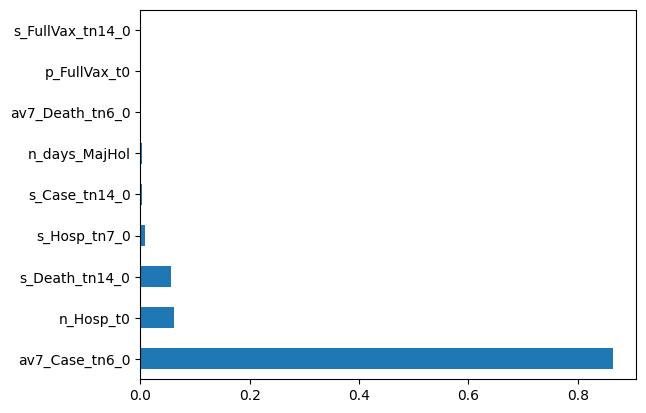

In [49]:
importance_sr = pd.Series(rf.feature_importances_,index =Xs.columns)
importance_sr.sort_values(ascending=False).plot.barh()
plt.show()

### Decision Trees

In [50]:
param_grid = {
    'criterion':['mse','friedman_mse','mae','squared_error','absolute_error','poisson'],
    'splitter' : ['best','random'],
    'max_depth': [10, 20, 40, 50, 60], 
    'min_samples_split': [5, 10, 20, 30, 40], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}

gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
gridSearch.fit(Xs, y)
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

Best score:  -2584273.3429497355
Best parameters:  {'criterion': 'squared_error', 'max_depth': 50, 'min_impurity_decrease': 0, 'min_samples_split': 5, 'splitter': 'random'}


In [51]:
param_grid = {
    'criterion':['mse','friedman_mse','mae','squared_error','absolute_error','poisson'],
    'splitter' : ['best','random'],
    'max_depth': [10, 20, 40, 50, 60], 
    'min_samples_split': [5, 10, 20, 30, 40], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}

gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
gridSearch.fit(Xs, y)
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

Best score:  -2567838.99644092
Best parameters:  {'criterion': 'squared_error', 'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 5, 'splitter': 'random'}


## The Analysis

In [52]:
BM1 = day_df.s_Death_tn14_0.isna()
BM2 = day_df.n_Hosp_t14.isna()
day_df[~(BM1|BM2)].shape

(525, 11)

In [53]:
X_train = day_df.loc['2020-04-12':'2021-09-04'].drop(columns=['t0','n_Hosp_t14'])
y_train = day_df.loc['2020-04-12':'2021-09-04'].n_Hosp_t14
print(X_train.shape,y_train.shape)

(511, 9) (511,)


In [54]:
X_test = day_df.loc['2021-09-05':'2021-09-18'].drop(columns=['t0','n_Hosp_t14'])
y_test = day_df.loc['2021-09-05':'2021-09-18'].n_Hosp_t14
print(X_test.shape,y_test.shape)

(14, 9) (14,)


In [55]:
X_predict= day_df.loc['2021-09-19':].drop(columns=['t0','n_Hosp_t14'])
print(X_predict.shape)

(15, 9)


### Linear Regression

In [56]:
X_train_local = sm.add_constant(X_train.drop(columns = ['s_FullVax_tn14_0','n_days_MajHol']))

sm.OLS(y_train, X_train_local).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             n_Hosp_t14   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     3723.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:18:04   Log-Likelihood:                -3559.1
No. Observations:                 511   AIC:                             7134.
Df Residuals:                     503   BIC:                             7168.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             344.7177     28.791     11.973      0.000     288.152     401.283
n_Hosp_t0           0.6396      0.048     13.225      0.000       0.545       0.735
s_Hosp_tn7_0        9.3466      0.665     14.056      0.000       8.040      10.653
av7_Case_tn6_0      0.2403      0.016     15.069      0.000       0.209       0.272
s_Case_tn14_0       0.5166      0.131      3.947      0.000       0.259       0.774
av7_Death_tn6_0    -4.9928      1.231     -4.057      0.000      -7.410      -2.575
s_Death_tn14_0   -137.3105     12.311    -11.154      0.000    -161.498    -113.123
p_FullVax_t0     -554.4639     51.765    -10.711      0.000    -656.165    -452.763
==============================================================================
Omnibus:                       22.613   Durbin-Watson:                   0.172
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.444
Skew:                           0.177   Prob(JB):                     4.09e-12
Kurtosis:                       4.529   Cond. No.                     2.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
lm = LinearRegression()

X_train.drop(columns = ['s_FullVax_tn14_0','n_days_MajHol'],inplace=True)

lm.fit(X_train, y_train)

LinearRegression()

In [58]:
# print coefficients
print('intercept ', lm.intercept_)
print(pd.DataFrame({'Predictor': X_train.columns, 'coefficient': lm.coef_}))

intercept  344.7176721144481
         Predictor  coefficient
0        n_Hosp_t0     0.639577
1     s_Hosp_tn7_0     9.346577
2   av7_Case_tn6_0     0.240350
3    s_Case_tn14_0     0.516613
4  av7_Death_tn6_0    -4.992831
5   s_Death_tn14_0  -137.310547
6     p_FullVax_t0  -554.463933


In [59]:
model_predict = pd.Series(lm.predict(X_train),
                        index = y_train.index)

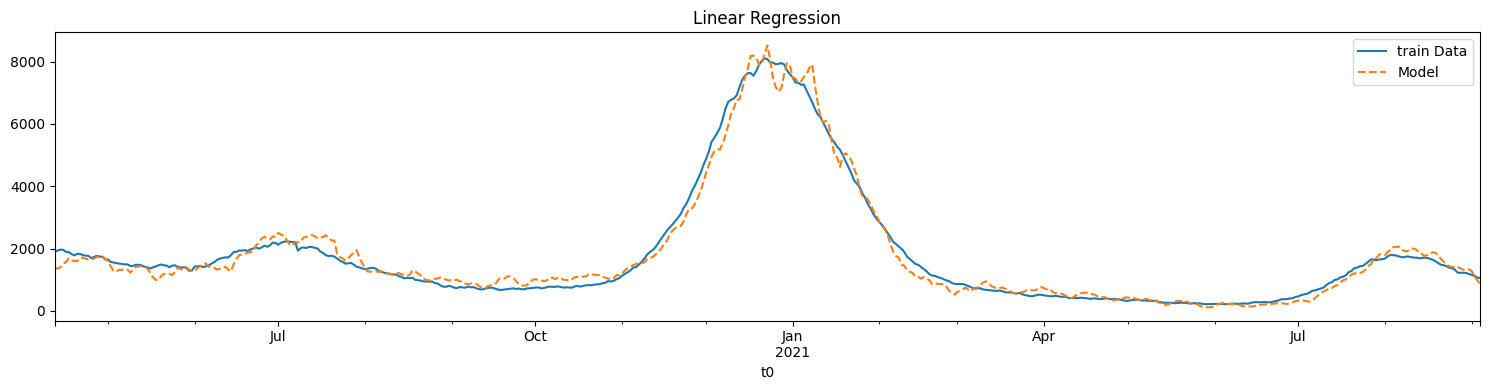

In [60]:
plt.figure(figsize=(15,4))
y_train.plot(label='train Data')
model_predict.plot(label = 'Model',style='--')

plt.title('Linear Regression')
plt.legend()
plt.tight_layout()
plt.savefig('LR DATAvsModel.png',dpi=900)

In [61]:
test_period = [i+ datetime.timedelta(days=14) for i in y_test.index]
predict_period = [i+ datetime.timedelta(days=14) for i in X_predict.index]

In [62]:
test_period

[Timestamp('2021-09-19 00:00:00'),
 Timestamp('2021-09-20 00:00:00'),
 Timestamp('2021-09-21 00:00:00'),
 Timestamp('2021-09-22 00:00:00'),
 Timestamp('2021-09-23 00:00:00'),
 Timestamp('2021-09-24 00:00:00'),
 Timestamp('2021-09-25 00:00:00'),
 Timestamp('2021-09-26 00:00:00'),
 Timestamp('2021-09-27 00:00:00'),
 Timestamp('2021-09-28 00:00:00'),
 Timestamp('2021-09-29 00:00:00'),
 Timestamp('2021-09-30 00:00:00'),
 Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-10-02 00:00:00')]

In [63]:
predict_period

[Timestamp('2021-10-03 00:00:00'),
 Timestamp('2021-10-04 00:00:00'),
 Timestamp('2021-10-05 00:00:00'),
 Timestamp('2021-10-06 00:00:00'),
 Timestamp('2021-10-07 00:00:00'),
 Timestamp('2021-10-08 00:00:00'),
 Timestamp('2021-10-09 00:00:00'),
 Timestamp('2021-10-10 00:00:00'),
 Timestamp('2021-10-11 00:00:00'),
 Timestamp('2021-10-12 00:00:00'),
 Timestamp('2021-10-13 00:00:00'),
 Timestamp('2021-10-14 00:00:00'),
 Timestamp('2021-10-15 00:00:00'),
 Timestamp('2021-10-16 00:00:00'),
 Timestamp('2021-10-17 00:00:00')]

In [64]:
predict_test = pd.Series(lm.predict(X_test.drop(columns = ['s_FullVax_tn14_0','n_days_MajHol'])),
                        index = test_period)
predict_predict = pd.Series(lm.predict(X_predict.drop(columns = ['s_FullVax_tn14_0','n_days_MajHol'])),
                        index = predict_period)

update_y_test = pd.Series(y_test.values, index = test_period)

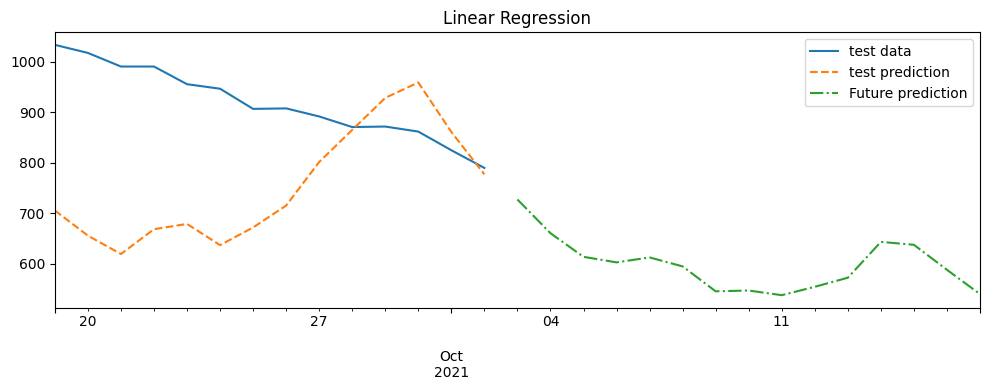

In [65]:
plt.figure(figsize=(10,4))
update_y_test.plot(label='test data')
predict_test.plot(label='test prediction',style='--')
predict_predict.plot (label='Future prediction',style='-.')
plt.title('Linear Regression')
plt.legend()
plt.tight_layout()
plt.savefig('LR Test_Prediction.png',dpi=900)

### Decision Tree

In [66]:
X_train = day_df.loc['2020-04-12':'2021-08-31'].drop(columns=['t0','n_Hosp_t14'])
y_train = day_df.loc['2020-04-12':'2021-08-31'].n_Hosp_t14
X_test = day_df.loc['2021-09-01':'2021-09-14'].drop(columns=['t0','n_Hosp_t14'])
y_test = day_df.loc['2021-09-01':'2021-09-14'].n_Hosp_t14

In [67]:
dt = DecisionTreeRegressor(criterion=gridSearch.best_params_['criterion'],
                           splitter=gridSearch.best_params_['splitter'],
                           max_depth=gridSearch.best_params_['max_depth'],
                           min_samples_split = gridSearch.best_params_['min_samples_split'],
                           min_impurity_decrease = gridSearch.best_params_['min_impurity_decrease'])
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_impurity_decrease=0.0005,
                      min_samples_split=5, splitter='random')

In [68]:
dt_model_predict = pd.Series(dt.predict(X_train),
                        index = y_train.index)

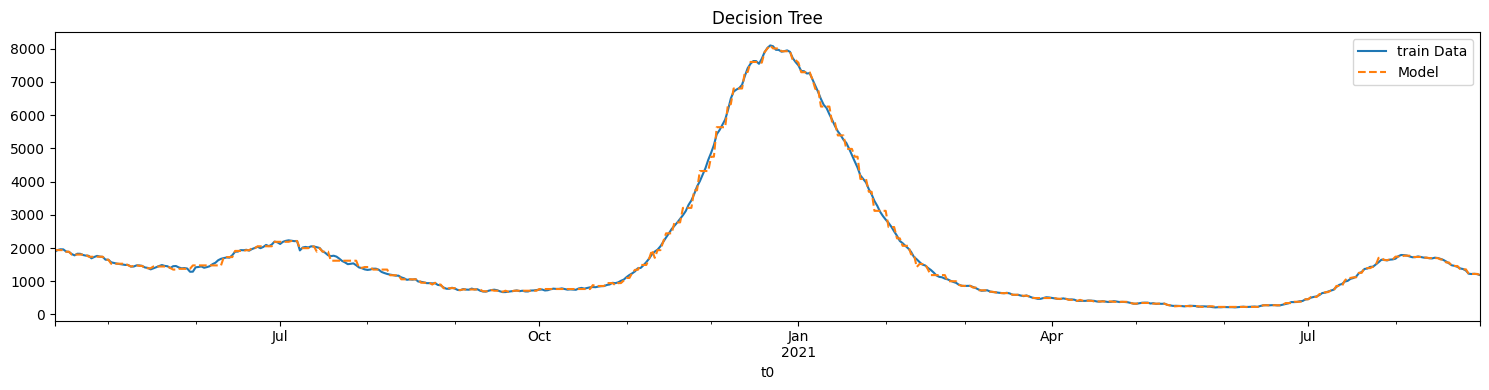

In [69]:
plt.figure(figsize=(15,4))
y_train.plot(label='train Data')
dt_model_predict.plot(label = 'Model',style='--')

plt.title('Decision Tree')
plt.legend()
plt.tight_layout()
plt.savefig('DT DATAvsModel.png',dpi=900)

In [70]:
dt_predict_test = pd.Series(dt.predict(X_test),
                        index = test_period)
dt_predict_predict = pd.Series(dt.predict(X_predict),
                        index = predict_period)

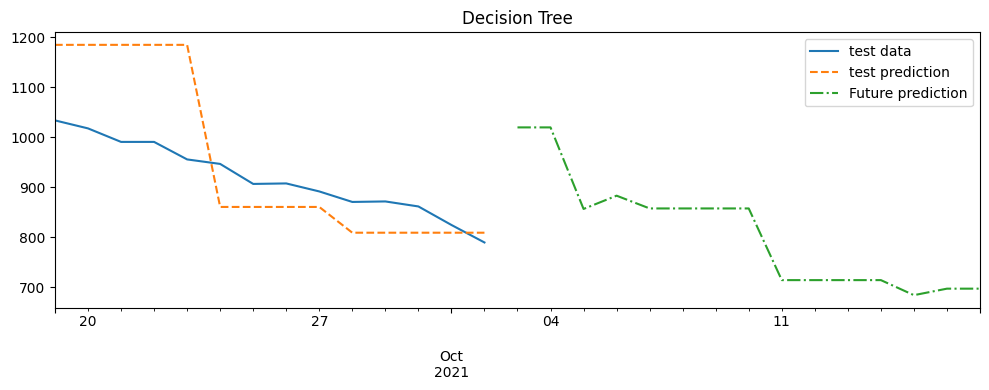

In [71]:
plt.figure(figsize=(10,4))
update_y_test.plot(label='test data')
dt_predict_test.plot(label='test prediction',style='--')
dt_predict_predict.plot(label='Future prediction',style='-.')
plt.title('Decision Tree')
plt.legend()
plt.tight_layout()
plt.savefig('DT Test_Prediction.png',dpi=900)

### MLP

In [72]:
X_train = day_df.loc['2020-04-12':'2021-08-31'].drop(columns=['t0','n_Hosp_t14'])
y_train = day_df.loc['2020-04-12':'2021-08-31'].n_Hosp_t14
X_test = day_df.loc['2021-09-01':'2021-09-14'].drop(columns=['t0','n_Hosp_t14'])
y_test = day_df.loc['2021-09-01':'2021-09-14'].n_Hosp_t14




In [73]:
param_grid = {
    'hidden_layer_sizes':[5,(5,5),(10,5),(5,10),(5,5,5),(5,10,5),(10,5,10)],
    'activation': ['identity','logistic','tanh','relu'],
    'solver': ['lbfgs','adam'],
    'learning_rate':['constant','invscaling','adaptive'],
    'max_iter':[200,500,1000,2000]}

gridSearch = GridSearchCV(MLPRegressor(), param_grid, cv=4,
                          scoring='neg_mean_squared_error',verbose=2)
gridSearch.fit(X_train, y_train)
print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 4 folds for each of 672 candidates, totalling 2688 fits
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=adam; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=adam; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=adam; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, ma

In [74]:
mlp = MLPRegressor(hidden_layer_sizes=gridSearch.best_params_['hidden_layer_sizes'],
                   activation=gridSearch.best_params_['activation'],
                   learning_rate=gridSearch.best_params_['learning_rate'],
                   solver=gridSearch.best_params_['solver'],
                   max_iter=gridSearch.best_params_['max_iter'])
mlp.fit(X_train, y_train)    

MLPRegressor(hidden_layer_sizes=(10, 5), max_iter=500, solver='lbfgs')

In [75]:
mlp_model_predict = pd.Series(mlp.predict(X_train),
                        index = y_train.index)

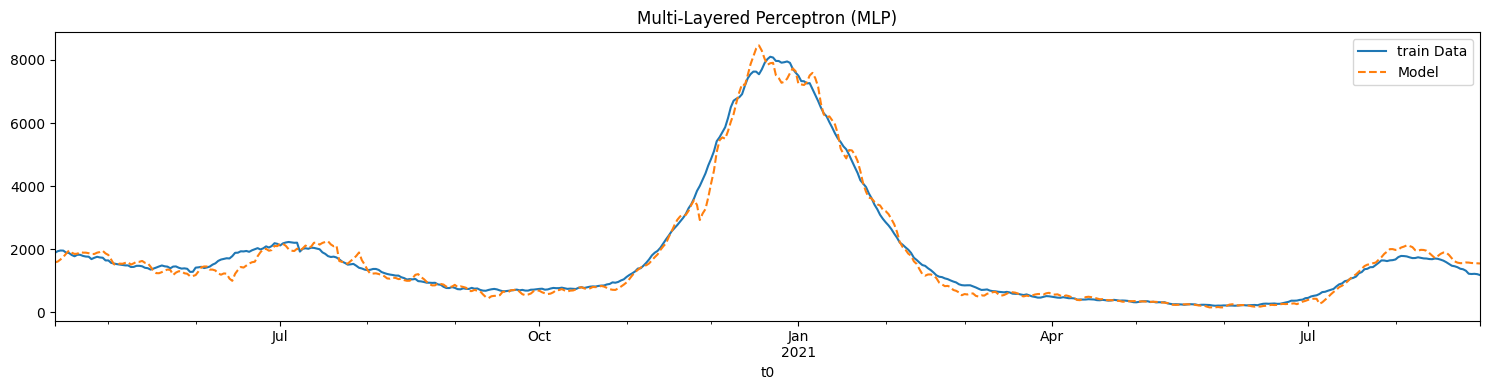

In [76]:
plt.figure(figsize=(15,4))
y_train.plot(label='train Data')
mlp_model_predict.plot(label = 'Model',style='--')

plt.title('Multi-Layered Perceptron (MLP)')
plt.legend()
plt.tight_layout()
plt.savefig('MLP DATAvsModel.png',dpi=900)

In [77]:
mlp_predict_test = pd.Series(mlp.predict(X_test),
                        index = test_period)
mlp_predict_predict = pd.Series(mlp.predict(X_predict),
                        index = predict_period)

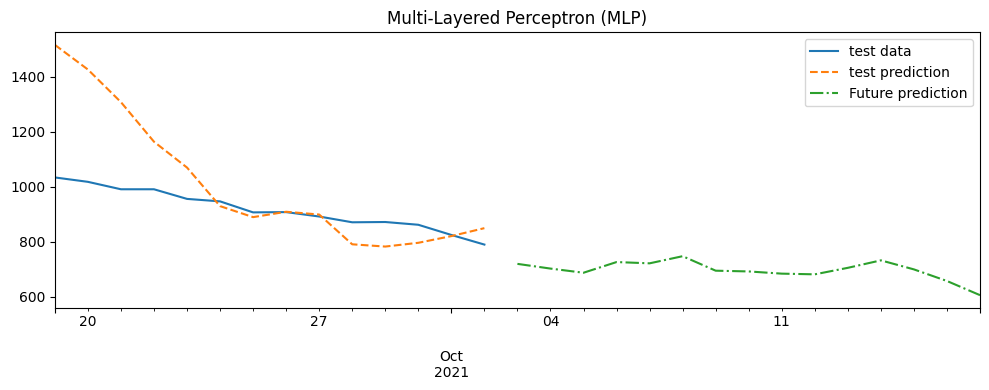

In [78]:
plt.figure(figsize=(10,4))
update_y_test.plot(label='test data')
mlp_predict_test.plot(label='test prediction',style='--')
mlp_predict_predict.plot(label='Future prediction',style='-.')
plt.title('Multi-Layered Perceptron (MLP)')
plt.legend()
plt.tight_layout()
plt.savefig('MLP Test_Prediction.png',dpi=900)

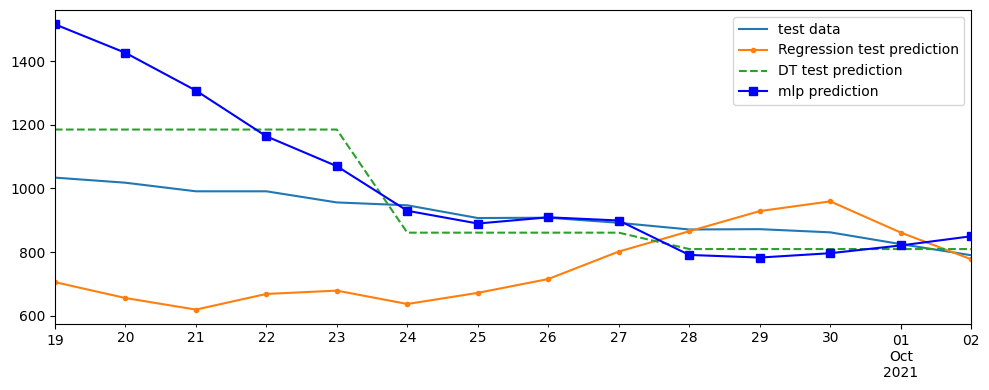

In [79]:
plt.figure(figsize=(10,4))
update_y_test.plot(label='test data')
predict_test.plot(label='Regression test prediction',style='.-')
dt_predict_test.plot(label='DT test prediction',style='--')
mlp_predict_test.plot(label='mlp prediction',style='bs-')


plt.legend()
plt.tight_layout()
plt.savefig('Compare Test_Prediction.png',dpi=900)